In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# # Load the CSV file
# df = pd.read_csv('SeoulBikeData.csv')

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
seoul_bike_sharing_demand = fetch_ucirepo(id=560) 

In [4]:
from datasets import load_dataset

ds = load_dataset("Greedjar74/Seoul_bike")

d:\SRH\Github\Improving-Forecasting-Accuracy-in-Bike-Rental-Demand-through-Advanced-Deep-Learning-Models\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
ds

DatasetDict({
    train: Dataset({
        features: ['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day'],
        num_rows: 8760
    })
})

In [6]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
seoul_bike_sharing_demand = fetch_ucirepo(id=560) 
  
# data (as pandas dataframes) 
X = seoul_bike_sharing_demand.data.features 
y = seoul_bike_sharing_demand.data.targets 
  
# metadata 
print(seoul_bike_sharing_demand.metadata) 
  
# variable information 
print(seoul_bike_sharing_demand.variables) 


{'uci_id': 560, 'name': 'Seoul Bike Sharing Demand', 'repository_url': 'https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand', 'data_url': 'https://archive.ics.uci.edu/static/public/560/data.csv', 'abstract': 'The dataset contains count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather data and holiday information', 'area': 'Business', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 8760, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Functioning Day'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Feb 05 2024', 'dataset_doi': '10.24432/C5F62R', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and a

In [7]:
df = pd.concat([X, y], axis=1)


In [8]:
print(df.head())

        Date  Rented Bike Count  Hour  Temperature  Humidity  Wind speed  \
0  1/12/2017                254     0         -5.2        37         2.2   
1  1/12/2017                204     1         -5.5        38         0.8   
2  1/12/2017                173     2         -6.0        39         1.0   
3  1/12/2017                107     3         -6.2        40         0.9   
4  1/12/2017                 78     4         -6.0        36         2.3   

   Visibility  Dew point temperature  Solar Radiation  Rainfall  Snowfall  \
0        2000                  -17.6              0.0       0.0       0.0   
1        2000                  -17.6              0.0       0.0       0.0   
2        2000                  -17.7              0.0       0.0       0.0   
3        2000                  -17.6              0.0       0.0       0.0   
4        2000                  -18.6              0.0       0.0       0.0   

  Seasons     Holiday Functioning Day  
0  Winter  No Holiday             Yes  


In [9]:
print(df.tail())

            Date  Rented Bike Count  Hour  Temperature  Humidity  Wind speed  \
8755  30/11/2018               1003    19          4.2        34         2.6   
8756  30/11/2018                764    20          3.4        37         2.3   
8757  30/11/2018                694    21          2.6        39         0.3   
8758  30/11/2018                712    22          2.1        41         1.0   
8759  30/11/2018                584    23          1.9        43         1.3   

      Visibility  Dew point temperature  Solar Radiation  Rainfall  Snowfall  \
8755        1894                  -10.3              0.0       0.0       0.0   
8756        2000                   -9.9              0.0       0.0       0.0   
8757        1968                   -9.9              0.0       0.0       0.0   
8758        1859                   -9.8              0.0       0.0       0.0   
8759        1909                   -9.3              0.0       0.0       0.0   

     Seasons     Holiday Functioning D

In [10]:
print(f"\nDataset Shape: {df.shape}")
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")


Dataset Shape: (8760, 14)
Number of Rows: 8760
Number of Columns: 14


In [11]:
print(df.columns.tolist())

['Date', 'Rented Bike Count', 'Hour', 'Temperature', 'Humidity', 'Wind speed', 'Visibility', 'Dew point temperature', 'Solar Radiation', 'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning Day']


In [33]:
df['Date']

TypeError: 'NoneType' object is not subscriptable

In [31]:
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['WeekOfYear'] = df['Date'].dt.isocalendar().week.astype(int)


# 5. WEATHER INTERACTION FEATURES
# -----------------------------
# df['temp_humidity_interaction'] = df['Temperature'] * df['Humidity']
df['feels_like_temp'] = df['Temperature'] - (0.1 * df['Humidity'])
# df['wind_chill'] = df['Temperature'] - (0.7 * df['Wind speed'])
# df['visibility_scaled'] = df['Visibility'] / 1000

# df['rain_indicator'] = (df['Rainfall'] > 0).astype(int)
# df['snow_indicator'] = (df['Snowfall'] > 0).astype(int)

# -----------------------------
# 6. PEAK HOUR FLAGS
# -----------------------------
df['is_morning_peak'] = df['Hour'].isin([7, 8, 9, 10]).astype(int)
df['is_evening_peak'] = df['Hour'].isin([17, 18, 19, 20]).astype(int)
df['is_low_demand_hour'] = df['Hour'].between(0, 5).astype(int)

# -----------------------------
# 7. WEEKEND & HOLIDAY FLAGS
# -----------------------------
df['is_weekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)

# Convert existing categorical fields to numeric
df['Holiday'] = df['Holiday'].map({'No Holiday': 0, 'Holiday': 1})
df['Functioning Day'] = df['Functioning Day'].map({'Yes': 1, 'No': 0})

# -----------------------------
# 8. DEMAND CHANGE FEATURES
# -----------------------------
df['demand_change_1h'] = df['Rented Bike Count'].diff(1)
df['demand_change_24h'] = df['Rented Bike Count'].diff(24)
df['demand_rate_of_change'] = df['demand_change_1h'] / (df['lag_1'] + 1e-6)


TypeError: 'NoneType' object is not subscriptable

In [30]:
print("\nDataset Info:")
print(df.info())


Dataset Info:


AttributeError: 'NoneType' object has no attribute 'info'

In [13]:
# Count missing values
print("\nMissing Values Count:")
print(df.isnull().sum())

# Percentage of missing values
print("\nMissing Values Percentage:")
missing_pct = (df.isnull().sum() / len(df)) * 100
print(missing_pct[missing_pct > 0])



Missing Values Count:
Date                     0
Rented Bike Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind speed               0
Visibility               0
Dew point temperature    0
Solar Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning Day          0
dtype: int64

Missing Values Percentage:
Series([], dtype: float64)


In [14]:
# Summary statistics for numerical columns
print("\nDescriptive Statistics:")
print(df.describe())

# More detailed statistics
print("\nDetailed Statistics:")
print(df.describe(include='all'))

# Specific measures
print("\nMean Values:")
print(df.mean(numeric_only=True))

print("\nMedian Values:")
print(df.median(numeric_only=True))

print("\nStandard Deviation:")
print(df.std(numeric_only=True))


Descriptive Statistics:


       Rented Bike Count         Hour  Temperature     Humidity   Wind speed  \
count        8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean          704.602055    11.500000    12.882922    58.226256     1.724909   
std           644.997468     6.922582    11.944825    20.362413     1.036300   
min             0.000000     0.000000   -17.800000     0.000000     0.000000   
25%           191.000000     5.750000     3.500000    42.000000     0.900000   
50%           504.500000    11.500000    13.700000    57.000000     1.500000   
75%          1065.250000    17.250000    22.500000    74.000000     2.300000   
max          3556.000000    23.000000    39.400000    98.000000     7.400000   

        Visibility  Dew point temperature  Solar Radiation     Rainfall  \
count  8760.000000            8760.000000      8760.000000  8760.000000   
mean   1436.825799               4.073813         0.569111     0.148687   
std     608.298712              13.060369         0.86


Target Variable: Rented Bike Count
Min: 0
Max: 3556
Mean: 704.60
Median: 504.50


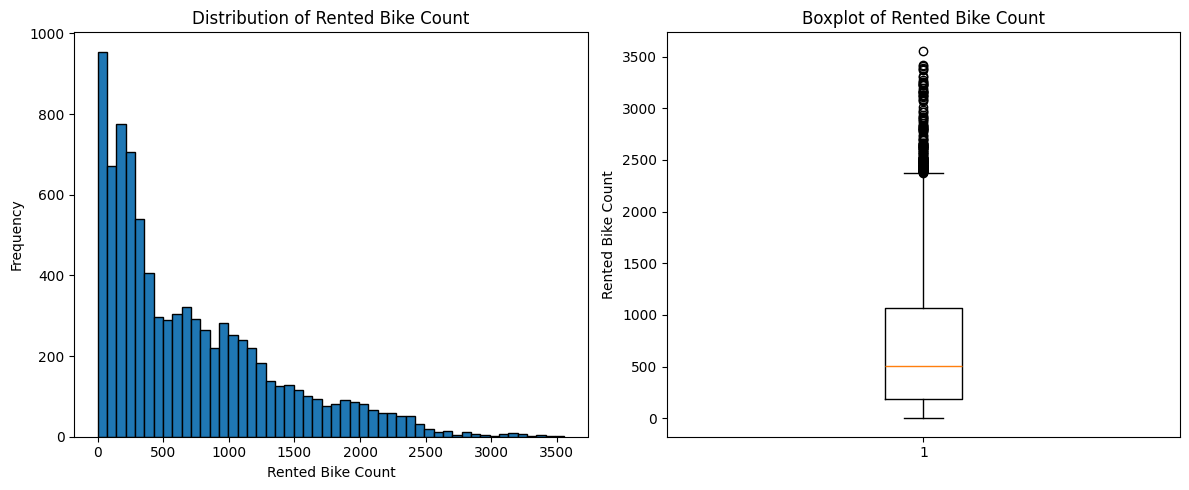

In [15]:
# Assuming target variable is bike count
target_col ='Rented Bike Count'

print(f"\nTarget Variable: {target_col}")
print(f"Min: {df[target_col].min()}")
print(f"Max: {df[target_col].max()}")
print(f"Mean: {df[target_col].mean():.2f}")
print(f"Median: {df[target_col].median():.2f}")

# Distribution of target variable
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df[target_col], bins=50, edgecolor='black')
plt.title(f'Distribution of {target_col}')
plt.xlabel(target_col)
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(df[target_col])
plt.title(f'Boxplot of {target_col}')
plt.ylabel(target_col)

plt.tight_layout()
plt.show()

In [16]:
# Count unique values per column
print("\nUnique Values per Column:")
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} unique values")
    
    # Show unique values if less than 15
    if unique_count < 15:
        print(f"  Values: {sorted(df[col].unique())}")


Unique Values per Column:
Date: 365 unique values
Rented Bike Count: 2166 unique values
Hour: 24 unique values
Temperature: 546 unique values
Humidity: 90 unique values
Wind speed: 65 unique values
Visibility: 1789 unique values
Dew point temperature: 556 unique values
Solar Radiation: 345 unique values
Rainfall: 61 unique values
Snowfall: 51 unique values
Seasons: 4 unique values
  Values: ['Autumn', 'Spring', 'Summer', 'Winter']
Holiday: 2 unique values
  Values: ['Holiday', 'No Holiday']
Functioning Day: 2 unique values
  Values: ['No', 'Yes']


In [17]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print("\nCategorical Columns Analysis:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print("\nProportions:")
    print(df[col].value_counts(normalize=True) * 100)
    



Categorical Columns Analysis:

Date:
Date
1/12/2017     24
2/12/2017     24
3/12/2017     24
4/12/2017     24
5/12/2017     24
              ..
26/11/2018    24
27/11/2018    24
28/11/2018    24
29/11/2018    24
30/11/2018    24
Name: count, Length: 365, dtype: int64

Proportions:
Date
1/12/2017     0.273973
2/12/2017     0.273973
3/12/2017     0.273973
4/12/2017     0.273973
5/12/2017     0.273973
                ...   
26/11/2018    0.273973
27/11/2018    0.273973
28/11/2018    0.273973
29/11/2018    0.273973
30/11/2018    0.273973
Name: proportion, Length: 365, dtype: float64

Seasons:
Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64

Proportions:
Seasons
Spring    25.205479
Summer    25.205479
Autumn    24.931507
Winter    24.657534
Name: proportion, dtype: float64

Holiday:
Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64

Proportions:
Holiday
No Holiday    95.068493
Holiday        4.931507
Name: proportion, dtyp

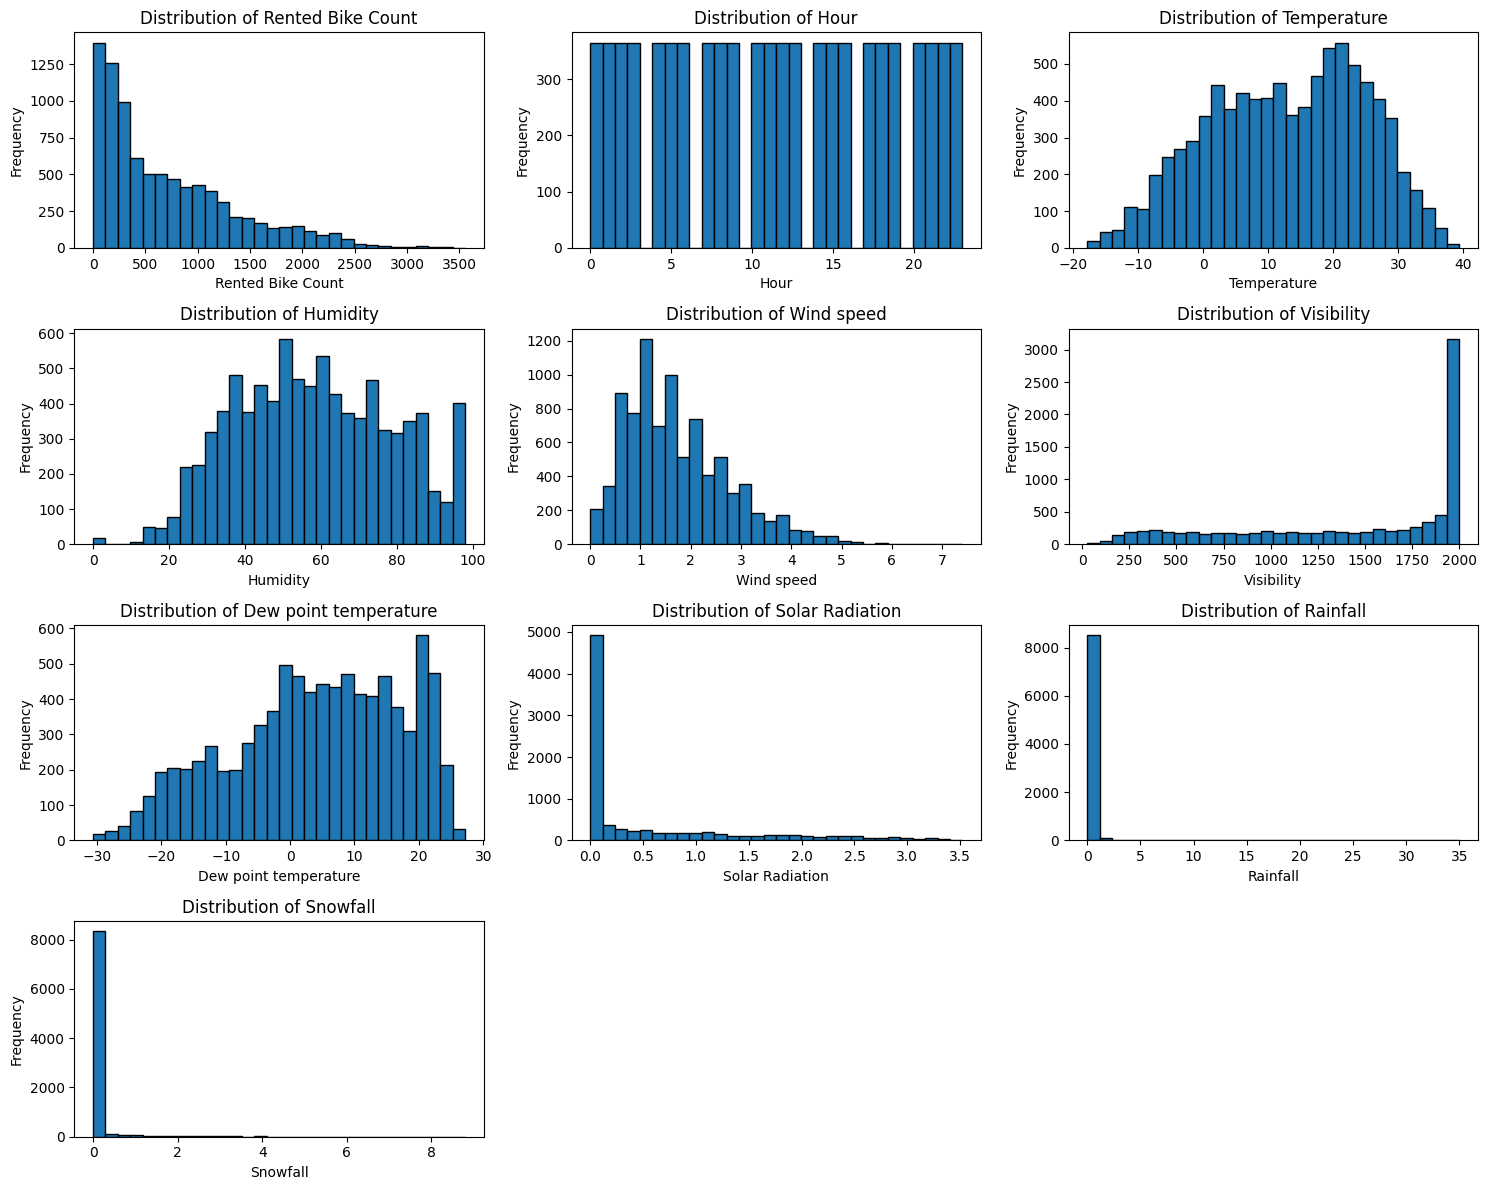

In [18]:
# Get numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Plot distributions
fig, axes = plt.subplots(nrows=(len(numerical_cols)+2)//3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col], bins=30, edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide empty subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

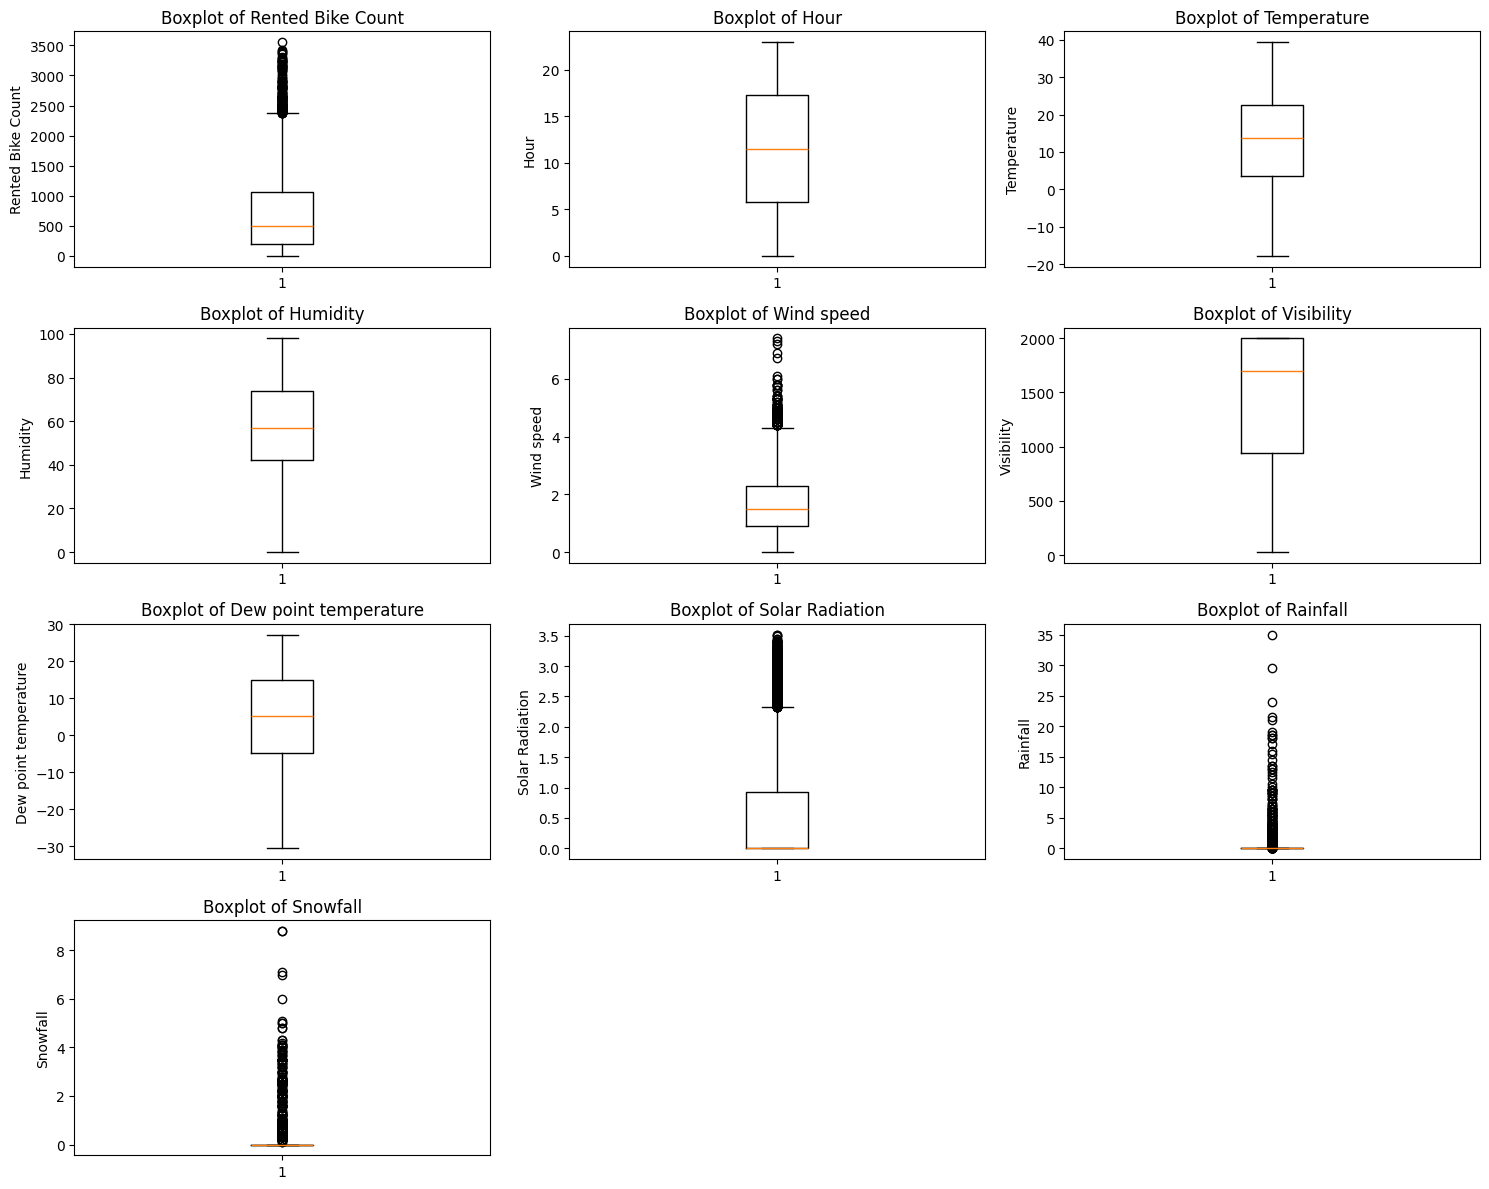


Outlier Detection (IQR Method):
Rented Bike Count: 158 outliers (1.80%)
Hour: 0 outliers (0.00%)
Temperature: 0 outliers (0.00%)
Humidity: 0 outliers (0.00%)
Wind speed: 161 outliers (1.84%)
Visibility: 0 outliers (0.00%)
Dew point temperature: 0 outliers (0.00%)
Solar Radiation: 641 outliers (7.32%)
Rainfall: 528 outliers (6.03%)
Snowfall: 443 outliers (5.06%)


In [19]:
# Boxplots for all numerical variables
numerical_cols = df.select_dtypes(include=[np.number]).columns

fig, axes = plt.subplots(nrows=(len(numerical_cols)+2)//3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].boxplot(df[col].dropna())
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel(col)

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# IQR method - count outliers
print("\nOutlier Detection (IQR Method):")
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_pct = (len(outliers) / len(df)) * 100
    
    print(f"{col}: {len(outliers)} outliers ({outlier_pct:.2f}%)")


Correlation with Target Variable:
Rented Bike Count        1.000000
Temperature              0.538558
Hour                     0.410257
Dew point temperature    0.379788
Solar Radiation          0.261837
Visibility               0.199280
Wind speed               0.121108
Rainfall                -0.123074
Snowfall                -0.141804
Humidity                -0.199780
Name: Rented Bike Count, dtype: float64


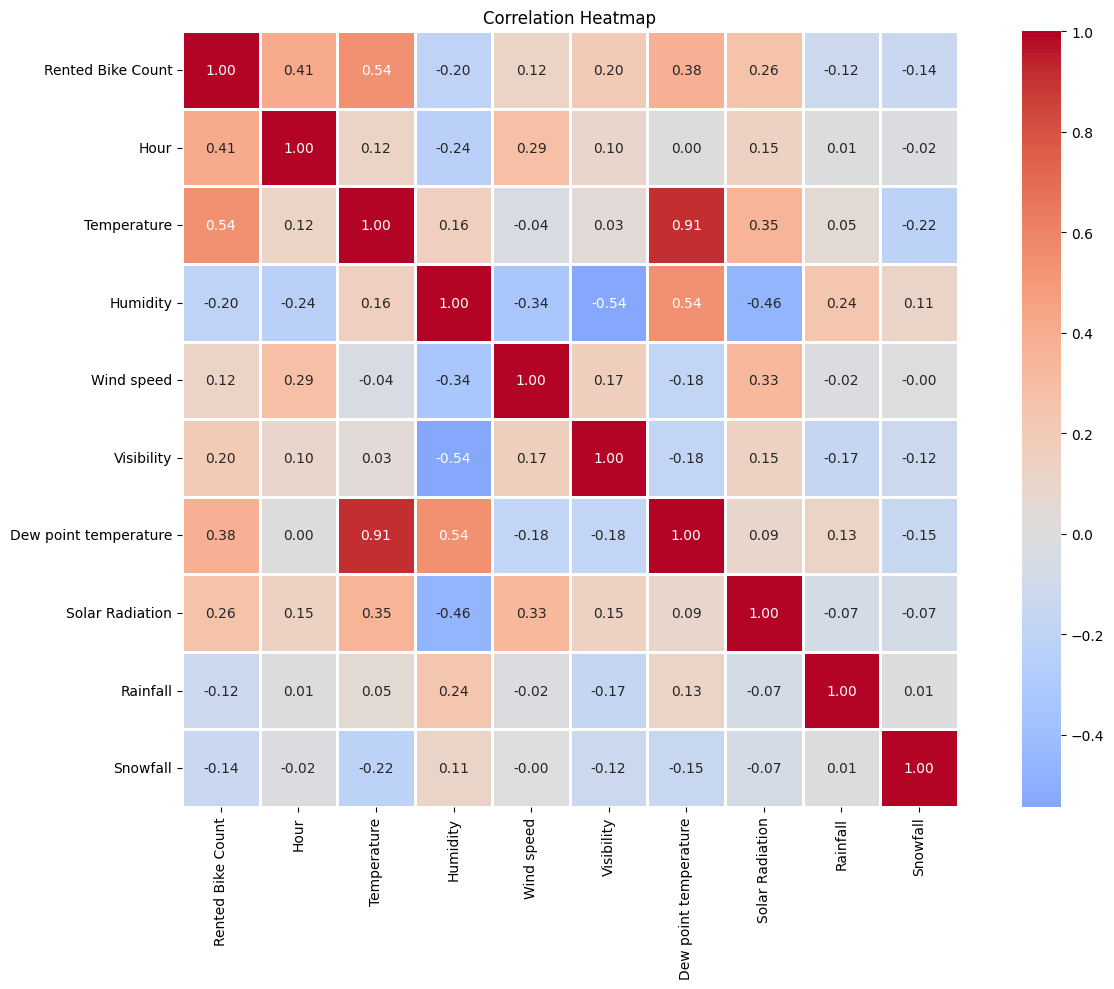

In [20]:
# Correlation matrix
correlation_matrix = df.corr(numeric_only=True)

print("\nCorrelation with Target Variable:")
target_corr = correlation_matrix[target_col].sort_values(ascending=False)
print(target_corr)

# Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [21]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_count}")

if duplicate_count > 0:
    print("\nDuplicate Rows:")
    print(df[df.duplicated(keep=False)])


Number of Duplicate Rows: 0


In [22]:
import numpy as np

# Lag features
df['demand_lag_1'] = df['Rented Bike Count'].shift(1)
df['demand_lag_24'] = df['Rented Bike Count'].shift(24)

# Rolling mean
df['demand_roll_mean_3'] = df['Rented Bike Count'].rolling(window=3).mean()

# Cyclical hour
df['hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)

# Interaction feature
df['temp_humidity'] = df['Temperature'] * df['Humidity']

# Weekend and Holiday flags
df['is_holiday'] = df['Holiday'].apply(lambda x: 1 if x == 'Holiday' else 0)
# df['is_weekend'] = df['Hour'].apply(lambda x: 1 if x in [5,6] else 0) # assuming 'Hour' means dayofweek, otherwise adjust

# Momentum feature
df['demand_diff_1h'] = df['Rented Bike Count'] - df['demand_lag_1']


TEST Work

Shape: (8760, 22)
Columns: ['Date', 'Rented Bike Count', 'Hour', 'Temperature', 'Humidity', 'Wind speed', 'Visibility', 'Dew point temperature', 'Solar Radiation', 'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning Day', 'demand_lag_1', 'demand_lag_24', 'demand_roll_mean_3', 'hour_sin', 'hour_cos', 'temp_humidity', 'is_holiday', 'demand_diff_1h']
Missing values:
 Date                      0
Rented Bike Count         0
Hour                      0
Temperature               0
Humidity                  0
Wind speed                0
Visibility                0
Dew point temperature     0
Solar Radiation           0
Rainfall                  0
Snowfall                  0
Seasons                   0
Holiday                   0
Functioning Day           0
demand_lag_1              1
demand_lag_24            24
demand_roll_mean_3        2
hour_sin                  0
hour_cos                  0
temp_humidity             0
is_holiday                0
demand_diff_1h            1
dtype: int

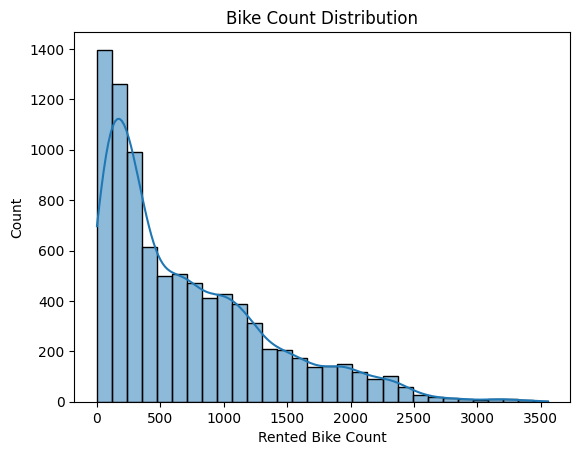

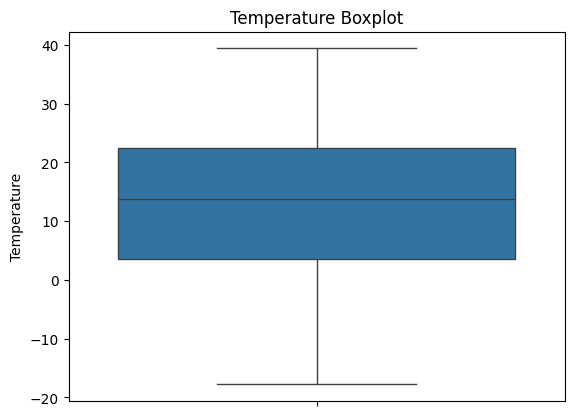

Top correlations with demand (Rented Bike Count):
 Rented Bike Count        1.000000
demand_roll_mean_3       0.934946
demand_lag_1             0.903454
demand_lag_24            0.681852
Temperature              0.538558
Hour                     0.410257
Dew point temperature    0.379788
temp_humidity            0.357094
Solar Radiation          0.261837
demand_diff_1h           0.219655
Visibility               0.199280
Wind speed               0.121108
is_holiday              -0.072338
hour_cos                -0.099507
Rainfall                -0.123074
Snowfall                -0.141804
Humidity                -0.199780
hour_sin                -0.431773
Name: Rented Bike Count, dtype: float64
Season counts:
 Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64
Holiday counts:
 Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64
Functioning Day counts:
 Functioning Day
Yes    8465
No      295
Name: count, dtype: int64


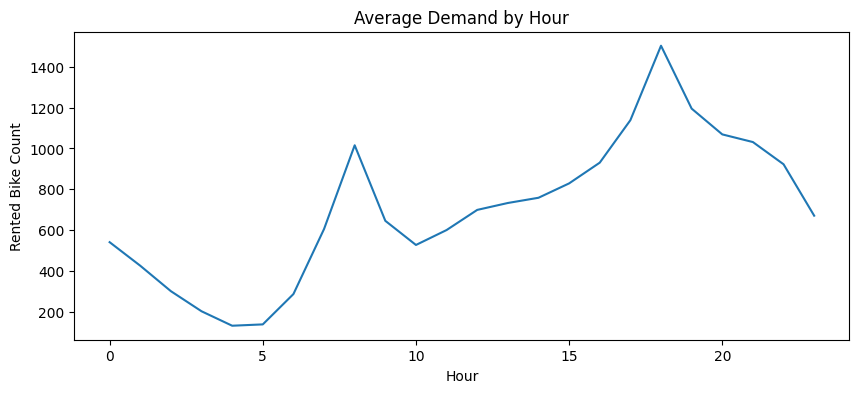

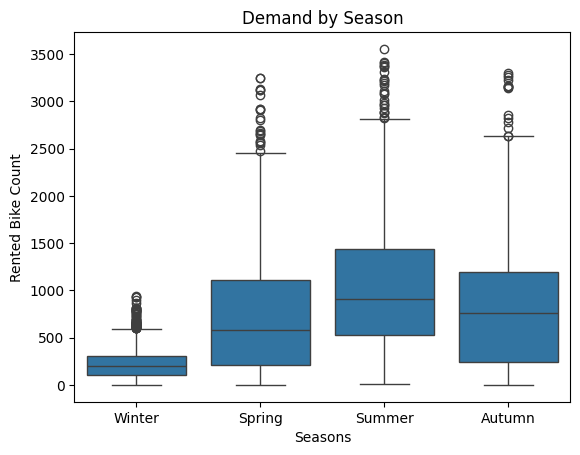

In [23]:

# 1. Overview
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Missing values:\n", df.isnull().sum())

# 2. Summary statistics (numeric)
summary = df.describe()
print("Summary statistics:\n", summary)

# 3. Outlier detection (IQR method)
def outlier_count(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    return len(outliers)

for col in ['Rented Bike Count','Wind speed','Solar Radiation','Rainfall','Snowfall']:
    print(f"{col} outliers:", outlier_count(col))

# 4. Distribution & visualization
sns.histplot(df['Rented Bike Count'], bins=30, kde=True)
plt.title('Bike Count Distribution')
plt.show()

sns.boxplot(df['Temperature'])
plt.title('Temperature Boxplot')
plt.show()

# 5. Correlation matrix
corr = df.corr(numeric_only=True)
print("Top correlations with demand (Rented Bike Count):\n", corr['Rented Bike Count'].sort_values(ascending=False))

# 6. Categorical summaries
print("Season counts:\n", df['Seasons'].value_counts())
print("Holiday counts:\n", df['Holiday'].value_counts())
print("Functioning Day counts:\n", df['Functioning Day'].value_counts())

# 7. Key visual time/seasonality patterns
plt.figure(figsize=(10,4))
sns.lineplot(data=df.groupby('Hour')['Rented Bike Count'].mean().reset_index(), x='Hour', y='Rented Bike Count')
plt.title('Average Demand by Hour')
plt.show()

sns.boxplot(x='Seasons', y='Rented Bike Count', data=df)
plt.title('Demand by Season')
plt.show()


New try

In [34]:
df= pd.read_csv('SeoulBikeData.csv', encoding= 'latin1' )
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
